In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [177]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

Estimated coefficients: 22.84898230806577 3.4103229995131317
r2 score for perfect model is 0.6922946529147002 

Extrapolate data: If the ground temperature reached 95,the crickets would be chirping at 19 chirps per second

Rate of 18 chirps per second. What was the approximate ground temperature that morning? Answer is 75 F


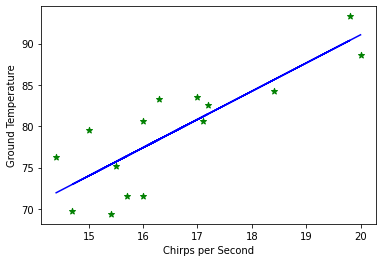

In [181]:
x = np.array(df["Chirps/Second"])
y = np.array(df["Ground Temperature"])
 
 
# number of observations/points
n = np.size(x)
 
# mean of x and y vector
m_x = np.mean(x)
m_y = np.mean(y)
 
# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
 

# plotting the actual points as scatter plot
plt.scatter(x, y, color = "g",marker = "*", s = 40)
# predicted response vector
y_pred = b_0 + b_1*x
print("Estimated coefficients:",b_0,b_1)

# plotting the regression line
plt.plot(x, y_pred, color = "b")
 
# putting labels
plt.xlabel('Chirps per Second')
plt.ylabel('Ground Temperature')
 
r2 = r2_score(y, y_pred)
print('r2 score for perfect model is', r2,'\n') 

print("Extrapolate data: If the ground temperature reached 95,the crickets would be chirping at 19 chirps per second\n")
print("Rate of 18 chirps per second. What was the approximate ground temperature that morning? Answer is 75 F")


In [189]:
x = df["Ground Temperature"]
x = x.to_frame()
y = np.array(df["Chirps/Second"])
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


r-squared:  0.6922946529146998


array([86.40743135])

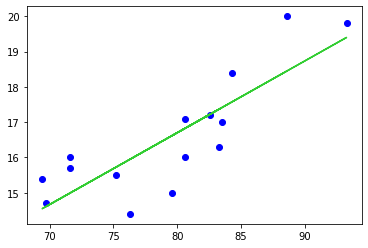

In [198]:
plt.scatter(x, y, color='blue')
plt.plot(x, linreg.predict(x), color='limegreen')
print('r-squared: ', linreg.score(x, y))
#Interpolate 
(18 - linreg.intercept_) / linreg.coef_

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

Estimated coefficients: 91.00439620740684 0.9664963676725761
r2 score for perfect model is 0.8726620843043331
Sincc r2 score is greater than 0.80, there is STRONG corelation


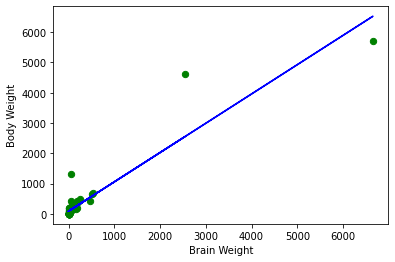

In [85]:
df1 = pd.read_fwf("brain_body.txt")
df1.head()
x = np.array(df1["Brain"])
y = np.array(df1["Body"])

# number of observations/points
n = np.size(x)
 
# mean of x and y vector
m_x = np.mean(x)
m_y = np.mean(y)
 
# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
 

# plotting the actual points as scatter plot
plt.scatter(x, y, color = "g",marker = "o", s = 40)
# predicted response vector
y_pred = b_0 + b_1*x
print("Estimated coefficients:",b_0,b_1)

# plotting the regression line
plt.plot(x, y_pred, color = "b")
 
# putting labels
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
 
r2 = r2_score(y, y_pred)
print('r2 score for perfect model is', r2) 
print('Sincc r2 score is greater than 0.80, there is STRONG corelation')

In [201]:
x = df1['Brain']
x = x.to_frame()
y = df1['Body']
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


r-squared:  0.8726620843043331


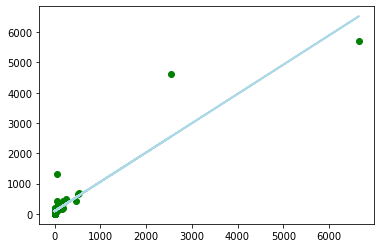

In [204]:
plt.scatter(x, y, color='green')
plt.plot(x, linreg.predict(x), color='lightblue', linewidth=2)
print('r-squared: ', linreg.score(x, y))

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [170]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df2[feature]
y = df2.Salary

linreg = linear_model.LinearRegression()
linreg.fit(x, y)
 
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))



Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


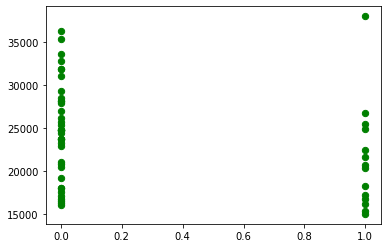

In [171]:
x = df2.Sex
y = df2.Salary
n = np.size(x)
 
# mean of x and y vector
m_x = np.mean(x)
m_y = np.mean(y)
 
# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x
 
# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
 

# plotting the actual points as scatter plot
plt.scatter(x, y, color = "g",marker = "o", s = 40)